<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

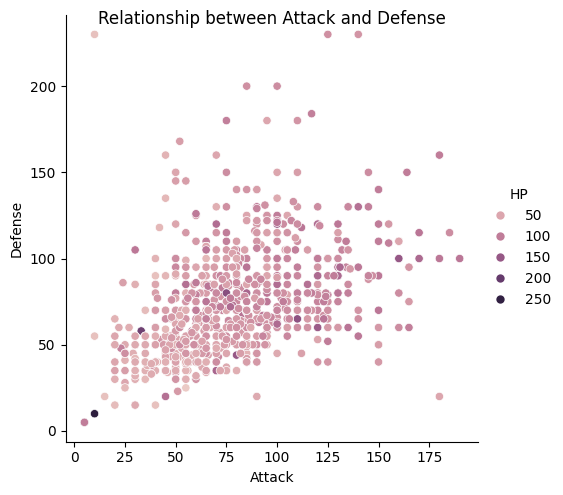

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv")
pokemon.head()

plot = sns.relplot(
    data = pokemon,
    x = "Attack",
    y = "Defense",
    hue = "HP",
)

plot.fig.suptitle("Relationship between Attack and Defense")

plot

From the plot, I observed that attack and defense have a positive correlation as attack values tend to increase with defense values. Generally speaking, there seems HP also seems to increase alongside attack and defense. More specifically, there is a large cluster of points with an HP value of 50 for points with attack and defense values under 100. Pokemon with high HP tend to fall around low to medium attack or defense ranges. There are a couple outliers such as the Pokemon with over 200 defense and roughly 10 attack and the Pokemon with 200+ defense and ~130 attack.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

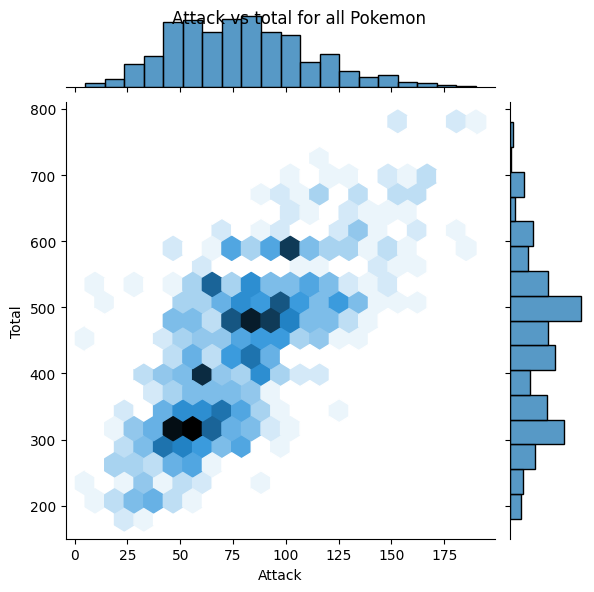

In [6]:
plot = sns.jointplot(
    data = pokemon,
    x = "Attack",
    y = "Total",
    kind = "hex",
    gridsize = 20,
)

plot.fig.suptitle("Attack vs total for all Pokemon")

plot

From the plot, I observed that pokemon totals tend to increase as the attack increases. While most Pokemon's attack stats tend to fall around 50-100, Pokemon totals are tend to be split between values around 300 or 500. The plot also seems to have a pretty strong positive correlation between attack and total, seeing as there are few outliers and most of the data is clustered together.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

(<seaborn.axisgrid.FacetGrid at 0x781e62de9210>,
 <seaborn.axisgrid.FacetGrid at 0x781e62dd6a10>)

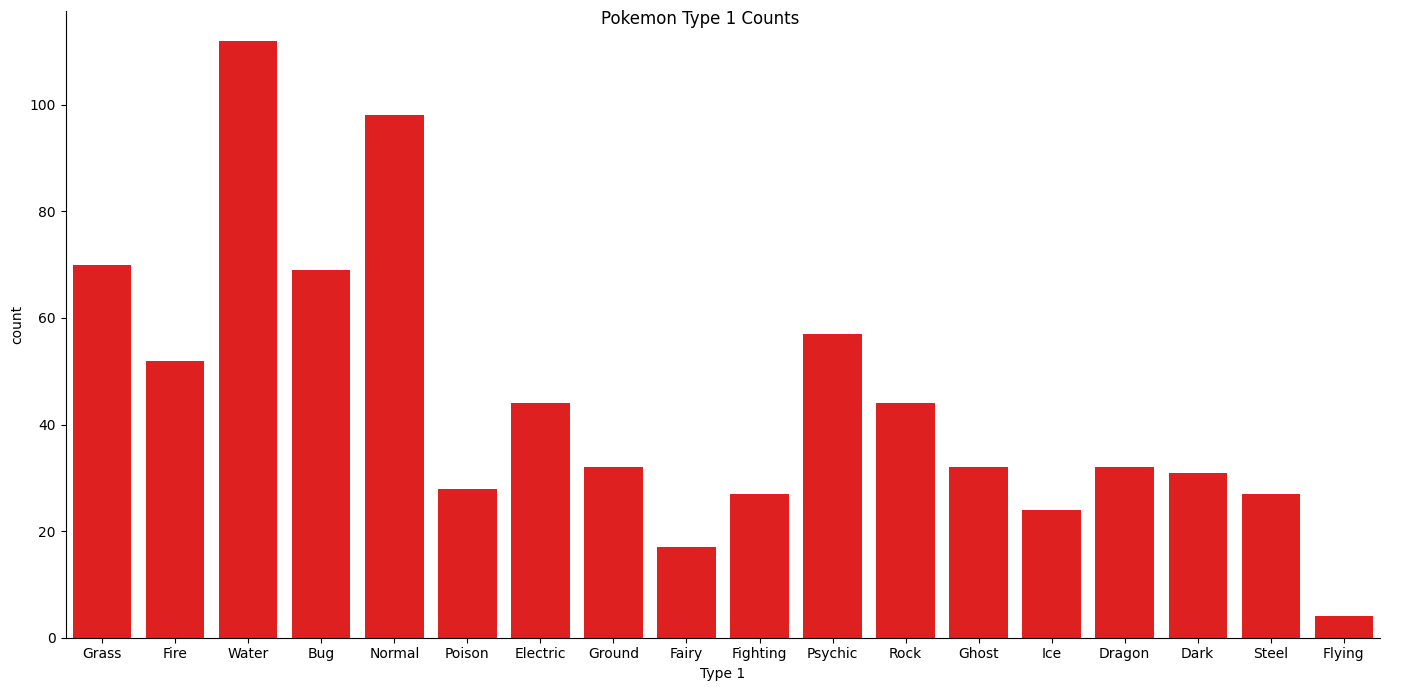

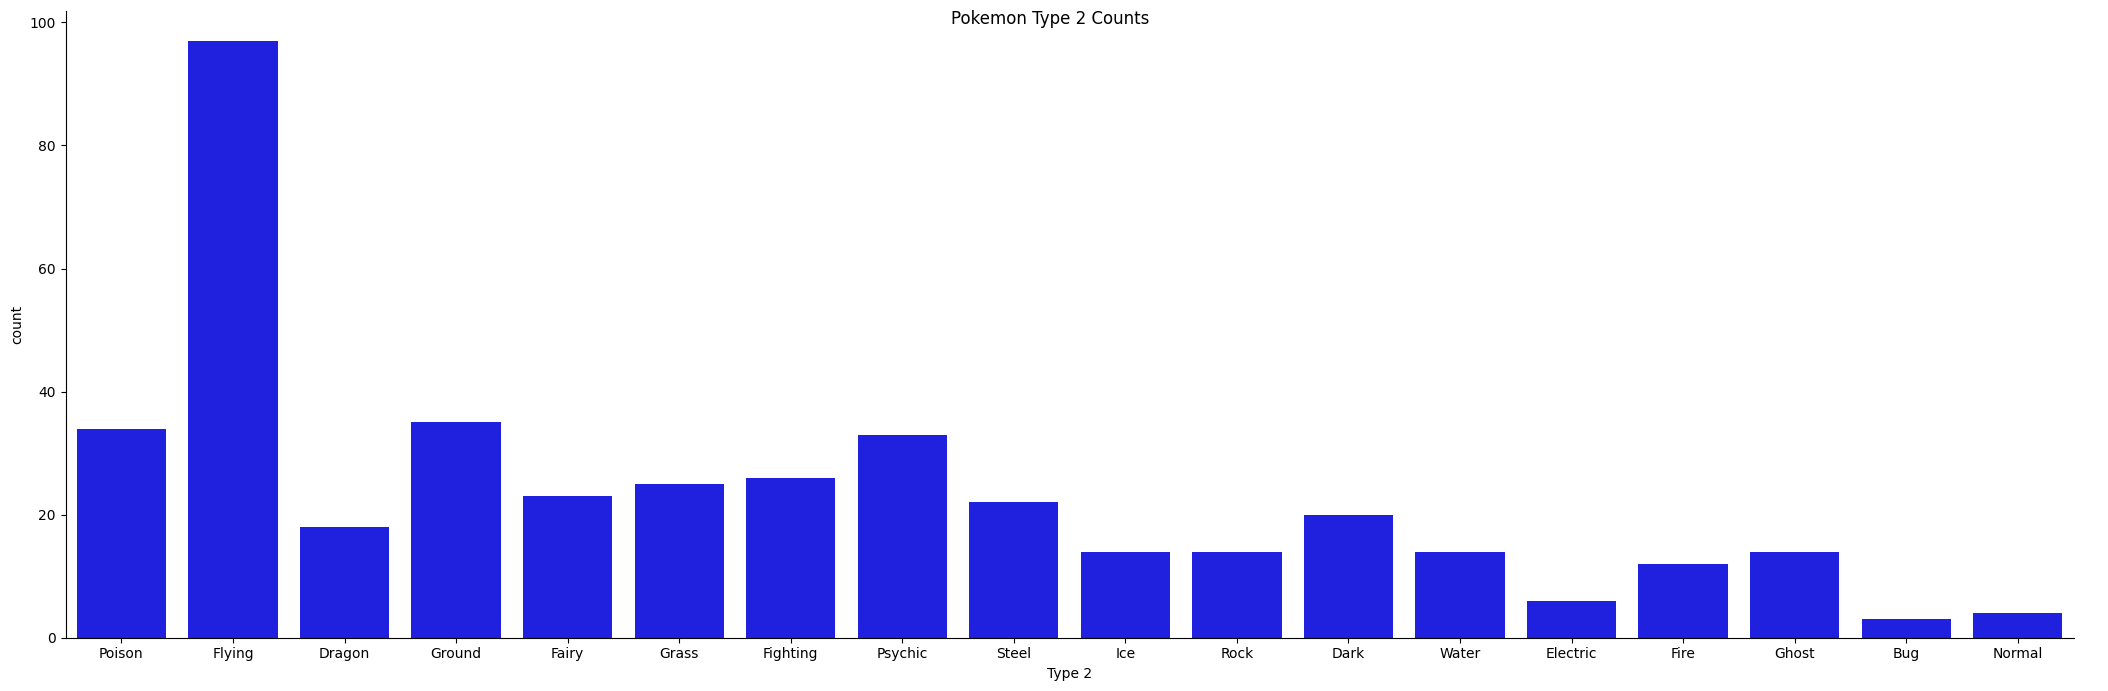

In [10]:
type1_plot = sns.catplot(
    data = pokemon,
    x = "Type 1",
    kind = "count",
    color = "red",
    height = 10,
    aspect = 2,
)

type2_plot = sns.catplot(
    data = pokemon,
    x = "Type 2",
    kind = "count",
    color = "blue",
    height = 10,
    aspect = 2,
)

type1_plot.fig.suptitle("Pokemon Type 1 Counts")
type2_plot.fig.suptitle("Pokemon Type 2 Counts")

type1_plot, type2_plot

### Which are the most common Type 1 and Type 2 Pokemons, and which are the most rare ones?
###Ans:
Most common Pokemon type 1: Water, Normal, Grass, Bug

Most common Pokemon type 2: Flying, Ground, Poison, Psychic

Most rare Pokemon type 1: Flying, Fairy, Ice

Most rare Pokemon type 2: Bug, Normal, Electric

